# 4th Gen Infiniti Academy Data Visualization Challenge - Legal
***
## 1. Introduction
*** insert text

## 2. Objectives from the data analysis
*** rephrase
- How to forecast revenues for the year?
- Strategies to adopt to reach revenue targets
- Performance in meeting the KPI
- Types of cases that brings in the most revenues
    - If there is any, who can take the case/ is there a distinction in skillsets/domain of each lawyers?
- How productive are the lawyers?
    - Does time correlate with their apportioned amount? 

## 3. Variables definitions
*** rephrase
- Apportionment
    - The legal term apportionment, also called delimitation, is in general the distribution or allotment of proper shares, though may have different meanings in different contexts. Apportionment can refer to estate, the amount of compensation received by a worker and in respect of time.
- Final Apportionment Amount
    - Revenue earned by each lawyer
- Case Type
    - Unable to provide further details - confidential
- Hours
    - Billable time clocked by each lawyer
    - Daily target = 10 hours (value 1 is equivalent to 10 hours)
- Cost to Company (CTC)
    - Cost to Company (CTC) is the yearly expenditure that a company spends on an employee. Each employee spend depends on their salary and variable.
    - CTC = Gross Salary + Other Benefits
    - In this dataset, CTC = Monthly Salary
        - Revenue targets are calculated based on multipliers of their salary

### 4. Importing & Pre-Processing Data
*** insert text 

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Visual formats
colors = ["#816C5B","#A9A18C", "#855723", "#"]
plt.style.use('seaborn')
sns.set_context('talk')

In [2]:
# Importing the data from xlsx files using pandas
apportionment = pd.read_excel('data.xlsx', sheet_name = 'Apportionment', parse_dates = True)
hours = pd.read_excel('data.xlsx', sheet_name = 'Hours', parse_dates = True)
ctc = pd.read_excel('data.xlsx', sheet_name = 'Cost to Company')


Printing the heads of each dataframe to see what we will be working with

In [3]:
# Prints the apportionment table
apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04-02-2022,Incoming Work,Paid,Lawyer A,160.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,84.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-2022,Protection,Paid,Lawyer A,74.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Prints the hours table
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833


In [5]:
# Prints the cost to company table
ctc

,User,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X
0,Lawyer A,3600.00,7200.00,10800.00,14400.00
1,Lawyer B,6284.43,12568.86,18853.29,25137.72
2,Lawyer C,7320.00,14640.00,21960.00,29280.00
3,Lawyer D,6284.43,12568.86,18853.29,25137.72
4,Lawyer E,7320.00,14640.00,21960.00,29280.00
5,Lawyer F,10308.75,20617.50,30926.25,41235.00
6,Lawyer G,5699.43,11398.86,17098.29,22797.72


*** rephrase \
First few things we can see are:
- date format in `apportionment['Date of Invoice']` table is not in YYYY/MM/DD format. Need to be consistent with the `hours[Date]` format in case we have the need to merge both tables.
- `Unnamed` columns in `apportionment` table

What may not be obvious is whether there are any missing values.

In [6]:
# Removing the unnamed columns in the apportionment table 
apportionment = apportionment.loc[:, ~apportionment.columns.str.contains('^Unnamed')]

# Converting the date into the same format as the date format in hours table
apportionment['Date of Invoice'] = pd.to_datetime(apportionment['Date of Invoice'], dayfirst = True)

apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount
0,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
1,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
2,2022-02-04,Incoming Work,Paid,Lawyer A,160.13
3,2022-02-04,Outgoing Work,Awaiting Payment,Lawyer A,84.00
4,2022-01-05,Protection,Paid,Lawyer A,74.04


In [7]:
# Checking if there is any missing data
print(apportionment.isna().any())
print(hours.isna().any())
print(ctc.isna().any())


Date of Invoice             True
Case Type                   True
Status                      True
User                        True
Final Apportioned Amount    True
dtype: bool
Date              False
User/Full Name    False
Actual Hours       True
dtype: bool
User        False
Mthly 1X    False
Mthly 2X    False
Mthly 3X    False
Mthly 4X    False
dtype: bool


From the output above, there are some missing values from both `apportionment` and `hours` data. We will drop them using the `dropna()` method.

In [8]:
# Dropping the missing data
apportionment.dropna()
hours.dropna()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833
...,...,...,...
4855,2022-01-04,Lawyer G,0.7622
4856,2022-01-03,Lawyer G,0.4397
4857,2022-01-03,Lawyer G,3.7603
4858,2022-01-03,Lawyer G,4.8642


Another noticeable feature from the table `hours` is that some rows can be merged together.

In [9]:
hours = hours.groupby(['Date', 'User/Full Name']).agg({'Actual Hours' : 'sum'}).reset_index()
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-01-01,Lawyer C,3.5000
1,2022-01-02,Lawyer C,2.0000
2,2022-01-03,Lawyer A,7.6330
3,2022-01-03,Lawyer B,6.9167
4,2022-01-03,Lawyer C,7.6668


### 5. Data Visualization & Analysis

*** insert text why I am dividing this section into Cases & Revenues and KPI
#### 5.1. Cases & Revenues
*** insert text


> #### 5.1.1. Types of Cases & Revenues Generated
*** rephrase \
Checking what sort of case types we have, and calling a `describe` method on the final apportioned amount for each of the cases. We will also be plotting a boxplot to visualize the description table.

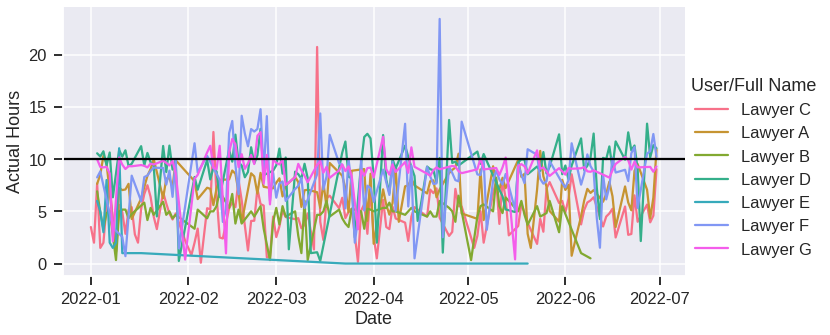

                Actual Hours
User/Full Name              
Lawyer A              7.2590
Lawyer B              5.0000
Lawyer C              4.8000
Lawyer D              9.4028
Lawyer E              2.0000
Lawyer F              8.4529
Lawyer G              9.2053


In [10]:
sns.relplot(data = hours,
            x = 'Date',
            y = 'Actual Hours',
            kind = 'line',
            aspect = 2,
            ci = None,
            hue = 'User/Full Name')
plt.axhline(y = 10,
            color = 'black',
            linestyle = '-')
plt.show()

print(hours.groupby('User/Full Name').agg({'Actual Hours' : 'median'}))


   Date of Invoice  Final Apportioned Amount     Month
0              1.0                  66153.76   January
1              2.0                 146794.65  February
2              3.0                 145597.80     March
3              4.0                  60115.02     April
4              5.0                  75407.00       May
5              6.0                 101926.95      June


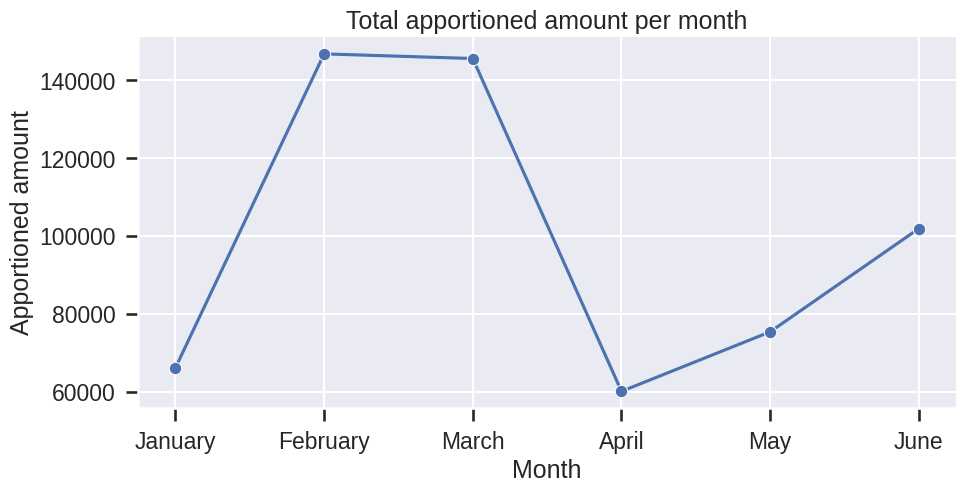

In [26]:
""" Monthly Revenue """
# Grouping the apportionment table by month only
apportionment_by_month = apportionment.groupby(apportionment['Date of Invoice'].dt.month).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month['Month'] = month_col(apportionment_by_month, 'Date of Invoice')
print(apportionment_by_month)

# Plotting total apportioned amount per month
sns.relplot(data = apportionment_by_month,
                x = 'Month',
                y = 'Final Apportioned Amount',
                ci = None,
                kind = 'line',
                marker = 'o',
                aspect = 2)
plt.ylabel('Apportioned amount')
plt.title('Total apportioned amount per month')
plt.show()

In [13]:
# Total apportioned amount per month by status

apportionment_by_month_status = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'Status']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

# Adding an extra column with month names
month_name = {1.0 : 'January',
            2.0 : 'February',
            3.0 : 'March',
            4.0 : 'April',
            5.0 : 'May',
            6.0 : 'June'}

apportionment_by_month_status['Month'] = apportionment_by_month_status['Date of Invoice'].apply(lambda x : month_name[x])

apportionment_by_month_status

,Date of Invoice,Status,Final Apportioned Amount,Month
0,1.0,Awaiting Payment,16830.00,January
1,1.0,Paid,49323.76,January
2,2.0,Awaiting Payment,62735.00,February
3,2.0,Paid,84059.65,February
4,3.0,Awaiting Payment,35580.00,March
5,3.0,Paid,110017.80,March
6,4.0,Awaiting Payment,41963.15,April
7,4.0,Paid,18151.87,April
8,5.0,Awaiting Payment,63149.00,May
9,5.0,Paid,12258.00,May


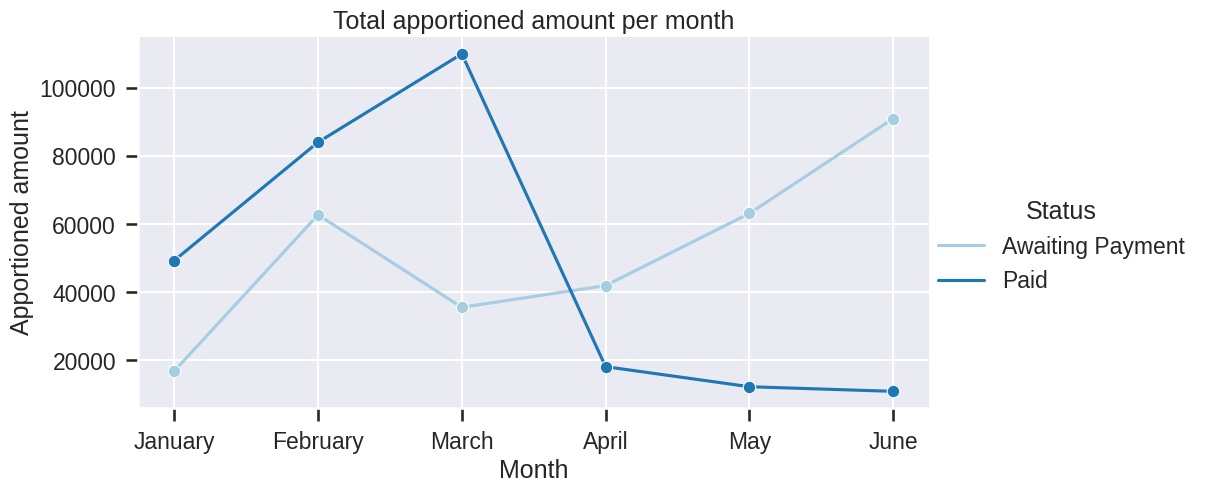

In [14]:
# Plotting total apportioned amount per month by status
sns.relplot(data = apportionment_by_month_status,
            x = 'Month',
            y = 'Final Apportioned Amount',
            ci = None,
            kind = 'line',
            hue = 'Status',
            aspect = 2,
            marker = 'o',
            palette = 'Paired')
plt.ylabel('Apportioned amount')
plt.title('Total apportioned amount per month')
plt.show()

In [36]:
# Cumulative sum
apportionment_by_month['Cumulative apportionment'] = apportionment_by_month['Final Apportioned Amount'].cumsum()
paid = apportionment_by_month_status.loc[apportionment_by_month_status['Status'] == 'Paid']
unpaid = apportionment_by_month_status.loc[apportionment_by_month_status['Status'] == 'Awaiting Payment']

paid['Cumulative paid apportionment'] = paid['Final Apportioned Amount'].cumsum()
unpaid['Cumulative unpaid apportionment'] = unpaid['Final Apportioned Amount'].cumsum()

paid
unpaid

/tmp/ipykernel_2953/3511159561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['Cumulative paid apportionment'] = paid['Final Apportioned Amount'].cumsum()
/tmp/ipykernel_2953/3511159561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpaid['Cumulative unpaid apportionment'] = unpaid['Final Apportioned Amount'].cumsum()


,Date of Invoice,Status,Final Apportioned Amount,Month,Cumulative unpaid apportionment
0,1.0,Awaiting Payment,16830.00,January,16830.00
2,2.0,Awaiting Payment,62735.00,February,79565.00
4,3.0,Awaiting Payment,35580.00,March,115145.00
6,4.0,Awaiting Payment,41963.15,April,157108.15
8,5.0,Awaiting Payment,63149.00,May,220257.15
10,6.0,Awaiting Payment,91026.95,June,311284.10


[]

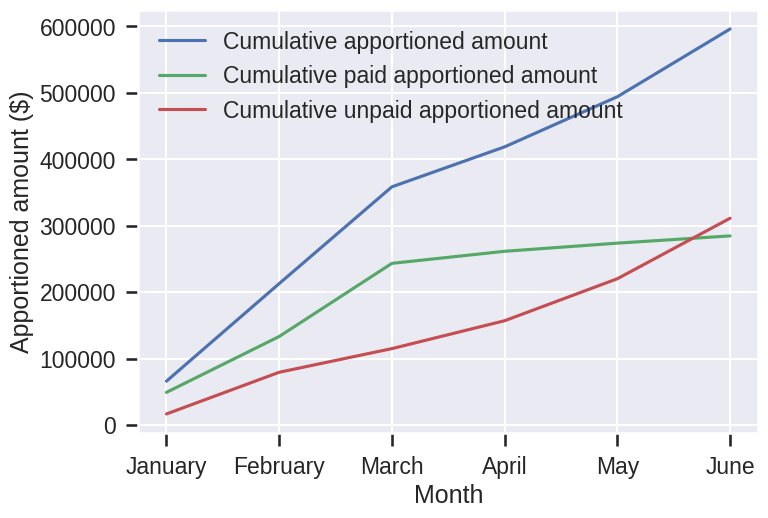

In [37]:
plt.plot(apportionment_by_month['Month'], apportionment_by_month['Cumulative apportionment'], label = 'Cumulative apportioned amount')
plt.plot(paid['Month'], paid['Cumulative paid apportionment'], label = 'Cumulative paid apportioned amount')
plt.plot(unpaid['Month'], unpaid['Cumulative unpaid apportionment'], label = 'Cumulative unpaid apportioned amount')
plt.ylabel('Apportioned amount ($)')
plt.xlabel('Month')
plt.legend()
plt.plot()

In [15]:
# Total apportioned amount per month by lawyers

apportionment_by_month_lawyers = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'User']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

# Adding an extra column with month names
apportionment_by_month_lawyers['Month'] = apportionment_by_month_lawyers['Date of Invoice'].apply(lambda x : month_name[x])

apportionment_by_month_lawyers

,Date of Invoice,User,Final Apportioned Amount,Month
0,1.0,Lawyer A,10444.39,January
1,1.0,Lawyer B,7755.00,January
2,1.0,Lawyer C,25991.67,January
3,1.0,Lawyer D,12089.42,January
4,1.0,Lawyer E,7499.34,January
5,1.0,Lawyer F,1000.00,January
6,1.0,Lawyer G,1373.94,January
7,2.0,Lawyer A,22396.51,February
8,2.0,Lawyer B,16416.40,February
9,2.0,Lawyer C,23161.25,February


In [16]:
# Prints out the unique case types using the unique method
apportionment['Case Type'].unique()

array(['Outgoing Work', 'Incoming Work', 'Protection',
       'Grant Supportable', 'Renewals', 'Commercialisation',
       'General Corporate', 'Dispute Resolution', 'Corporate Secretarial',
       'Miscellaneous', 'General Disputes', nan], dtype=object)

In [17]:
# Describes the final apportionment amount per case type
print(apportionment.groupby('Case Type', as_index = False).agg({'Final Apportioned Amount' : 'describe'}))

                Case Type Final Apportioned Amount                            \
                                             count         mean          std   
0       Commercialisation                      6.0  1583.333333  1708.490423   
1   Corporate Secretarial                     17.0  1203.529412   671.116834   
2      Dispute Resolution                     20.0  3326.972500  6729.327049   
3       General Corporate                      8.0  1072.500000  1517.014065   
4        General Disputes                     16.0  3819.375000  4389.923342   
5       Grant Supportable                     95.0  2222.868526  2460.961843   
6           Incoming Work                    143.0   560.552937   970.952618   
7           Miscellaneous                      3.0   566.666667   700.096034   
8           Outgoing Work                    203.0   475.408867   790.597331   
9              Protection                     59.0   645.866949   729.536179   
10               Renewals               

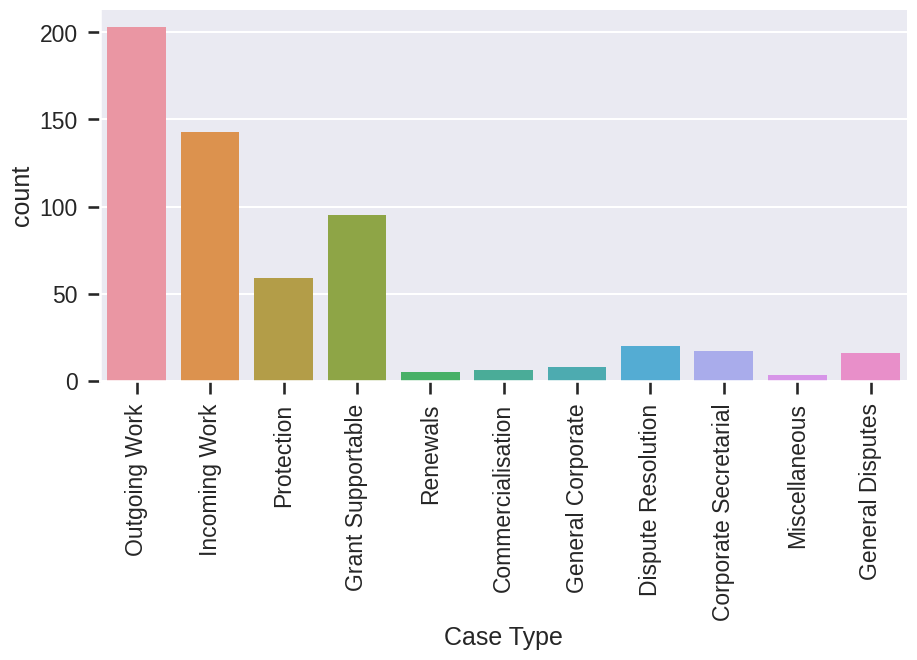

In [18]:
# Plot to show amount of cases managed
sns.catplot(data = apportionment,
                x = 'Case Type',
                kind = 'count',
                aspect = 2)
plt.xticks(rotation = 90)
plt.show()

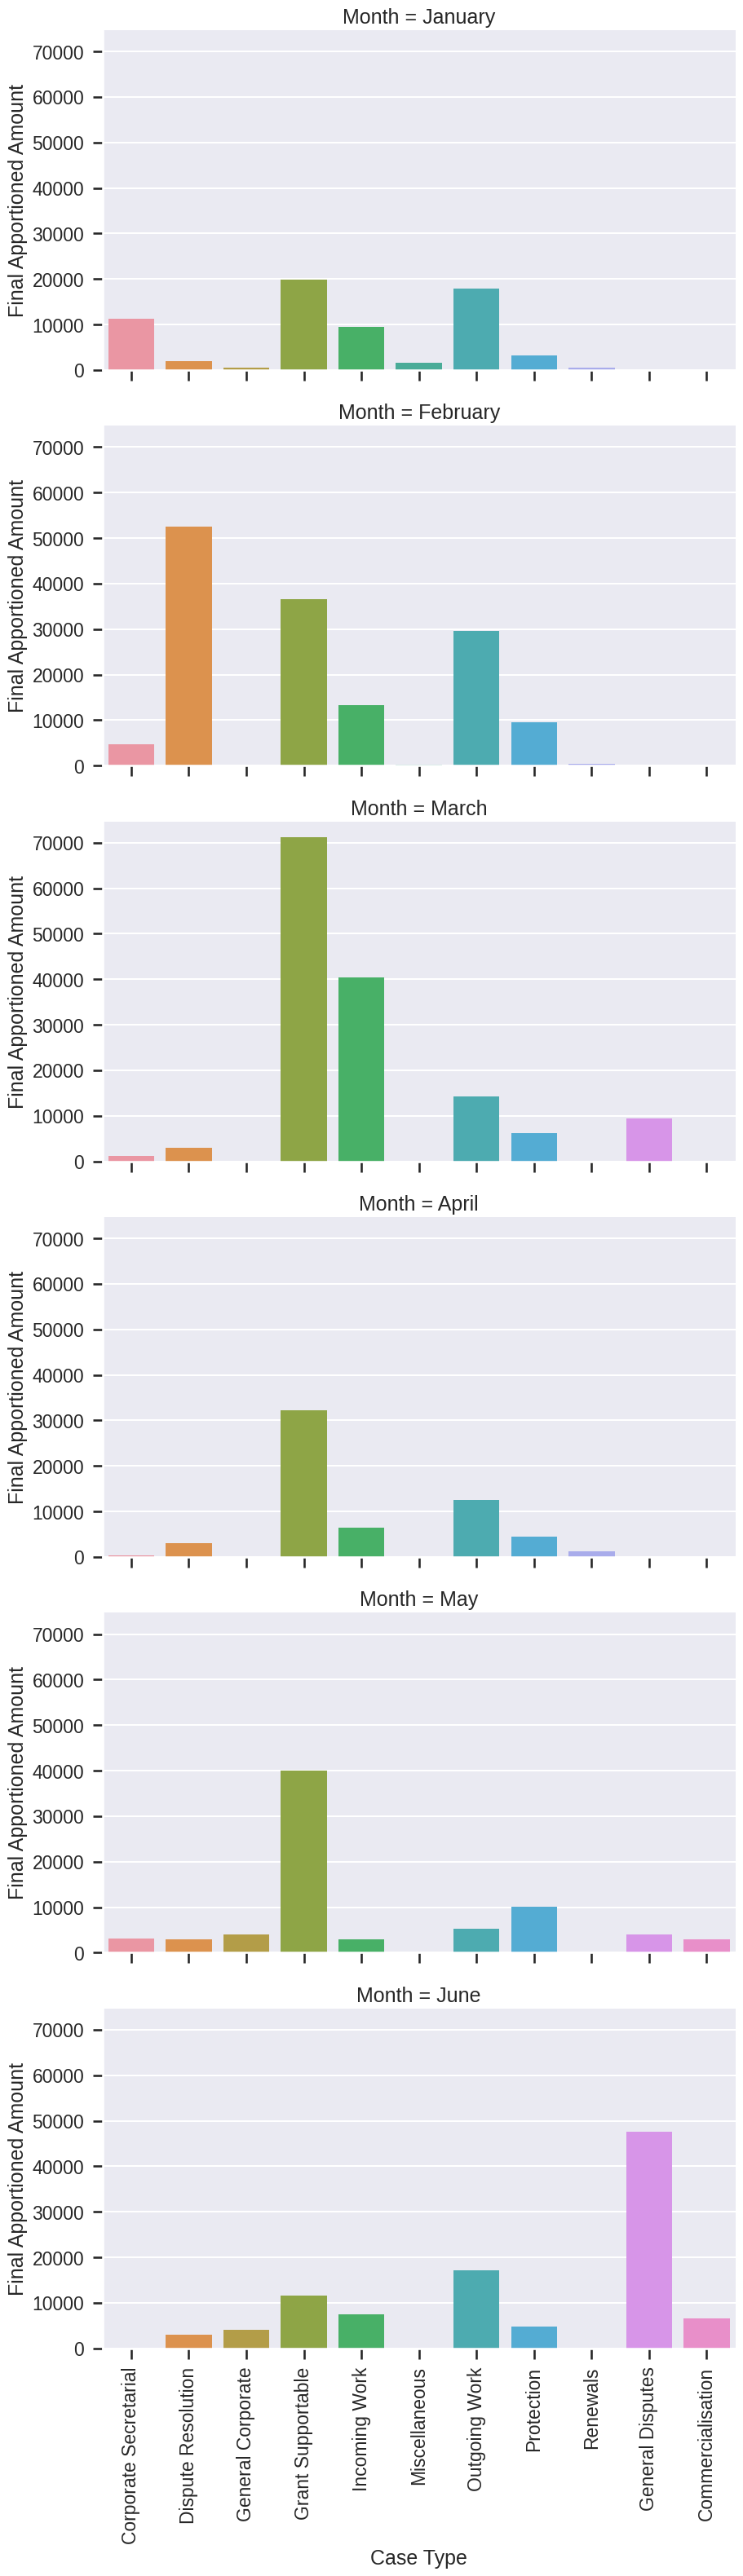

In [19]:
# Adding an extra column with month names
month_name = {1.0 : 'January',
            2.0 : 'February',
            3.0 : 'March',
            4.0 : 'April',
            5.0 : 'May',
            6.0 : 'June'}

def month_col (df, date):
    return df[date].apply(lambda x : month_name[x])
    
# Grouping the apportionment table by month and case type
apportionment_by_month_case = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'Case Type']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month_case['Month'] = month_col(apportionment_by_month_case, 'Date of Invoice')

# Plot to show apportionment ammount per case type
sns.catplot(data = apportionment_by_month_case,
                x = 'Case Type',
                y = 'Final Apportioned Amount',
                kind = 'bar',
                ci = None,
                row = 'Month',
                aspect = 2,
                dodge = True)
plt.xticks( rotation = 90)
plt.show()


In [ ]:
# Plot to show apportionment ammount per case type
sns.boxenplot(data = apportionment,
                x = 'Case Type',
                y = 'Final Apportioned Amount',
                dodge = True)
plt.xticks( rotation = 90)
plt.show()

*** insert text \
made a mathematical transformation `log('Final Apportioned Amount')` to see the differences better

In [ ]:
# Plot to show log(apportionment ammount) per case type
sns.boxenplot(data = apportionment, 
            x = 'Case Type',
            y = 'Final Apportioned Amount')
plt.xticks( rotation = 90)
plt.yscale('log')
plt.show()

*** insert description of visual

> ##### 5.1.2. Lawyer Specialization
*** insert text \
*** describe crosstable and heatmap

In [ ]:
lawyer_crosstab = pd.crosstab(apportionment['User'], apportionment['Case Type'])
lawyer_crosstab

In [ ]:
# Plotting a heatmap to visualize which lawyers can do which cases better(?)
sns.heatmap(lawyer_crosstab,
            cmap = 'rocket_r',
            linewidth = 1,
            linecolor = 'w',
            annot = True)
plt.title('Types of cases managed by each lawyers')
plt.show()

> ##### 5.1.3. Revenues according to each lawyers
*** insert text

In [ ]:
# Initialize a list of lawyers
Lawyers = ['Lawyer A', 'Lawyer B', 'Lawyer C', 'Lawyer D', 'Lawyer E', 'Lawyer F', 'Lawyer G']

# Looping through each lawyers and make a plot
for lawyer in Lawyers:
    l = apportionment[apportionment['User'] == lawyer]
    sns.catplot(data = l, x = 'Case Type', y = 'Final Apportioned Amount', kind = 'boxen').set(title = lawyer)
    plt.xticks( rotation = 90)
    plt.show()

> ##### 5.1.4. Cashflow Issues
*** insert text and data

In [ ]:
# Plotting a countplot to see how many cases are paid/awaiting payment
fig, ax = plt.subplots()
ax = sns.countplot( x = 'Status', data = apportionment)
plt.show()

In [ ]:
# Plotting a countplot to see how many cases are paid/awaiting payment
sns.countplot( x = 'Status', data = apportionment, hue = apportionment['Date of Invoice'].dt.month)
plt.legend(['January', 'February', 'March', 'April', 'May', 'June'])
plt.show()

insert amount of money haven't paid

#### 5.2. Key Performance Indicator KPI
*** insert text 
> ##### 5.2.1. Clocked Time

> ##### 5.2.2 Do the lawyers achieved their target revenue?
*** insert text

In [ ]:
# Merging apportionment table and hours table to investigate relationship between clocked hours and apportioned amount
apportionment_hours = apportionment.merge(hours, left_on = ['Date of Invoice', 'User'], right_on = ['Date', 'User/Full Name'], how = 'inner', suffixes = ['_a','_h'])

# Dropping redudant columns
apportionment_hours = apportionment_hours.drop(['Date', 'User/Full Name'], axis = 1)

# Renaming the column Date of Invoice to Date
apportionment_hours['Date'] = pd.to_datetime(apportionment_hours['Date of Invoice'])

# Scatter plot between final apportioned amount and actual hours
sns.lmplot(data = apportionment_hours, y = 'Final Apportioned Amount', x = 'Actual Hours', aspect = 2, line_kws = {'color' : 'black'}, scatter_kws = {'alpha' : 0.7}).set(title = 'Scatter plot between final apportioned amount against actual hours')
plt.show()


> ##### 5.2.3. Are the lawyers productive?
*** insert text \
*** insert scatterplot time vs apportioned, correlation

In [ ]:
# Correlation between final apportioned amount and actual hours
print('Correlation between clocked hours and apportioned amount: ' + str(apportionment_hours['Final Apportioned Amount'].corr(apportionment_hours['Actual Hours'])))



In [ ]:
sns.displot(data = apportionment,
            x = 'Final Apportioned Amount',
            hue = 'Case Type',
            kind = 'kde',
            aspect = 2,
            log_scale = None)
plt.show()

The above correlation test shows that the final apportioned amount and the actual hours has a very weak positive relationship.

### 6. Recommendations
*** insert text

### 7. Conclusions
*** insert text

In [20]:
apportionment_by_month_lawyer = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'User']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month_lawyer['Month'] = month_col(apportionment_by_month_lawyer, 'Date of Invoice')

apportionment_by_month_lawyer

,Date of Invoice,User,Final Apportioned Amount,Month
0,1.0,Lawyer A,10444.39,January
1,1.0,Lawyer B,7755.00,January
2,1.0,Lawyer C,25991.67,January
3,1.0,Lawyer D,12089.42,January
4,1.0,Lawyer E,7499.34,January
5,1.0,Lawyer F,1000.00,January
6,1.0,Lawyer G,1373.94,January
7,2.0,Lawyer A,22396.51,February
8,2.0,Lawyer B,16416.40,February
9,2.0,Lawyer C,23161.25,February


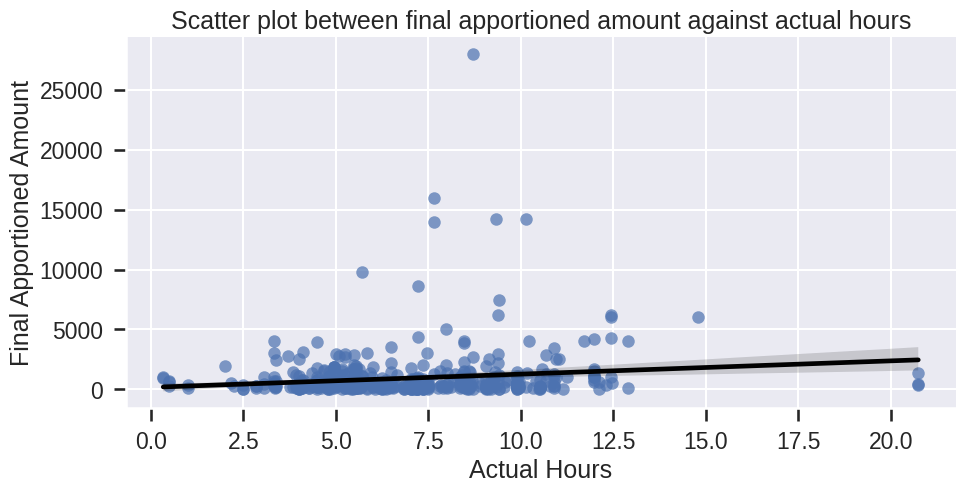

In [21]:
# Merging apportionment table and hours table to investigate relationship between clocked hours and apportioned amount
apportionment_hours = apportionment.merge(hours, left_on = ['Date of Invoice', 'User'], right_on = ['Date', 'User/Full Name'], how = 'inner', suffixes = ['_a','_h'])

# Dropping redudant columns
apportionment_hours = apportionment_hours.drop(['Date', 'User/Full Name'], axis = 1)

# Renaming the column Date of Invoice to Date
apportionment_hours['Date'] = pd.to_datetime(apportionment_hours['Date of Invoice'])

# Scatter plot between final apportioned amount and actual hours
sns.lmplot(data = apportionment_hours, y = 'Final Apportioned Amount', x = 'Actual Hours', aspect = 2, line_kws = {'color' : 'black'}, scatter_kws = {'alpha' : 0.7}).set(title = 'Scatter plot between final apportioned amount against actual hours')
plt.show()

In [ ]:
print('Correlation between clocked hours and apportioned amount: ' + str(round(apportionment_hours['Final Apportioned Amount'].corr(apportionment_hours['Actual Hours']),2)))


Correlation between clocked hours and apportioned amount: 0.14


In [22]:
kpi = apportionment_by_month_lawyer.merge(ctc, how='outer', on = 'User')
kpi

,Date of Invoice,User,Final Apportioned Amount,Month,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X
0,1.0,Lawyer A,10444.39,January,3600.00,7200.00,10800.00,14400.00
1,2.0,Lawyer A,22396.51,February,3600.00,7200.00,10800.00,14400.00
2,3.0,Lawyer A,11818.57,March,3600.00,7200.00,10800.00,14400.00
3,4.0,Lawyer A,6027.32,April,3600.00,7200.00,10800.00,14400.00
4,5.0,Lawyer A,6849.40,May,3600.00,7200.00,10800.00,14400.00
5,6.0,Lawyer A,15196.03,June,3600.00,7200.00,10800.00,14400.00
6,1.0,Lawyer B,7755.00,January,6284.43,12568.86,18853.29,25137.72
7,2.0,Lawyer B,16416.40,February,6284.43,12568.86,18853.29,25137.72
8,3.0,Lawyer B,25244.85,March,6284.43,12568.86,18853.29,25137.72
9,4.0,Lawyer B,10312.57,April,6284.43,12568.86,18853.29,25137.72


In [23]:
condlist = [kpi['Final Apportioned Amount'] > kpi['Mthly 4X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 3X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 2X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 1X']]

choicelist = ['> 4X', '> 3X', '> 2X', '> 1X']

default = 'Not met'

kpi['kpi'] = np.select(condlist, choicelist, default)

kpi


,Date of Invoice,User,Final Apportioned Amount,Month,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X,kpi
0,1.0,Lawyer A,10444.39,January,3600.00,7200.00,10800.00,14400.00,> 2X
1,2.0,Lawyer A,22396.51,February,3600.00,7200.00,10800.00,14400.00,> 4X
2,3.0,Lawyer A,11818.57,March,3600.00,7200.00,10800.00,14400.00,> 3X
3,4.0,Lawyer A,6027.32,April,3600.00,7200.00,10800.00,14400.00,> 1X
4,5.0,Lawyer A,6849.40,May,3600.00,7200.00,10800.00,14400.00,> 1X
5,6.0,Lawyer A,15196.03,June,3600.00,7200.00,10800.00,14400.00,> 4X
6,1.0,Lawyer B,7755.00,January,6284.43,12568.86,18853.29,25137.72,> 1X
7,2.0,Lawyer B,16416.40,February,6284.43,12568.86,18853.29,25137.72,> 2X
8,3.0,Lawyer B,25244.85,March,6284.43,12568.86,18853.29,25137.72,> 4X
9,4.0,Lawyer B,10312.57,April,6284.43,12568.86,18853.29,25137.72,> 1X


In [ ]:
# Subsetting the data frame according to each lawyers
def kpidf(x):
    return kpi.loc[kpi['User'] == x]

a_kpi = kpidf('Lawyer A')
b_kpi = kpidf('Lawyer B')
c_kpi = kpidf('Lawyer C')
d_kpi = kpidf('Lawyer D')
e_kpi = kpidf('Lawyer E')
f_kpi = kpidf('Lawyer F')
g_kpi = kpidf('Lawyer G')

In [ ]:
a_kpi

,Date of Invoice,User,Final Apportioned Amount,Month,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X,kpi
0,1.0,Lawyer A,10444.39,January,3600.0,7200.0,10800.0,14400.0,> 2X
1,2.0,Lawyer A,22396.51,February,3600.0,7200.0,10800.0,14400.0,> 4X
2,3.0,Lawyer A,11818.57,March,3600.0,7200.0,10800.0,14400.0,> 3X
3,4.0,Lawyer A,6027.32,April,3600.0,7200.0,10800.0,14400.0,> 1X
4,5.0,Lawyer A,6849.40,May,3600.0,7200.0,10800.0,14400.0,> 1X
5,6.0,Lawyer A,15196.03,June,3600.0,7200.0,10800.0,14400.0,> 4X


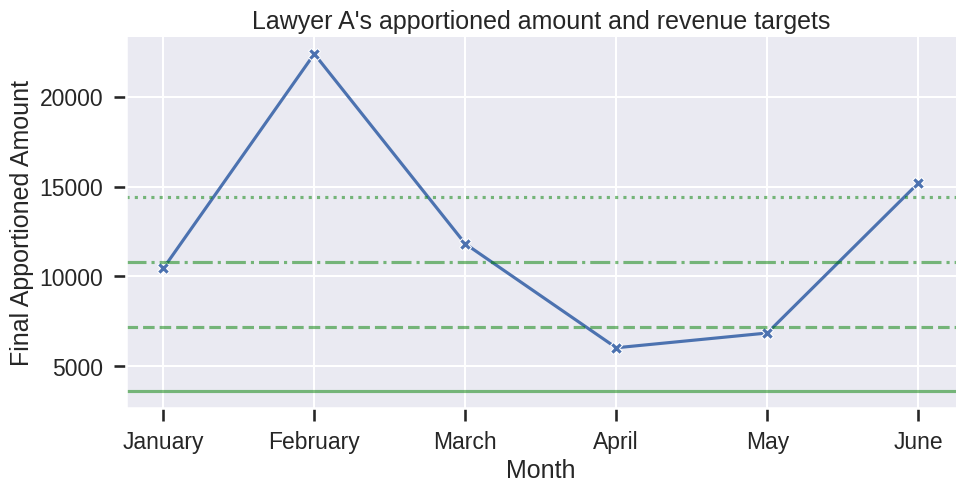

In [ ]:
def kpiplot(df, ctc, letter):
    sns.relplot(x = 'Month',
                y = 'Final Apportioned Amount',
                kind = 'line',
                marker = 'X',
                aspect = 2,
                data = df)
    plt.axhline(y = ctc, linestyle = '-', alpha = 0.5, color = 'g')
    plt.axhline(y = 2 * ctc, linestyle = '--', alpha = 0.5, color = 'g')
    plt.axhline(y = 3 * ctc, linestyle = '-.', alpha = 0.5, color = 'g')
    plt.axhline(y = 4 * ctc, linestyle = ':', alpha = 0.5, color = 'g')
    plt.title('Lawyer ' + str(letter) + '\'s apportioned amount and revenue targets')
    return plt.show()

kpiplot(a_kpi, 3600, 'A')

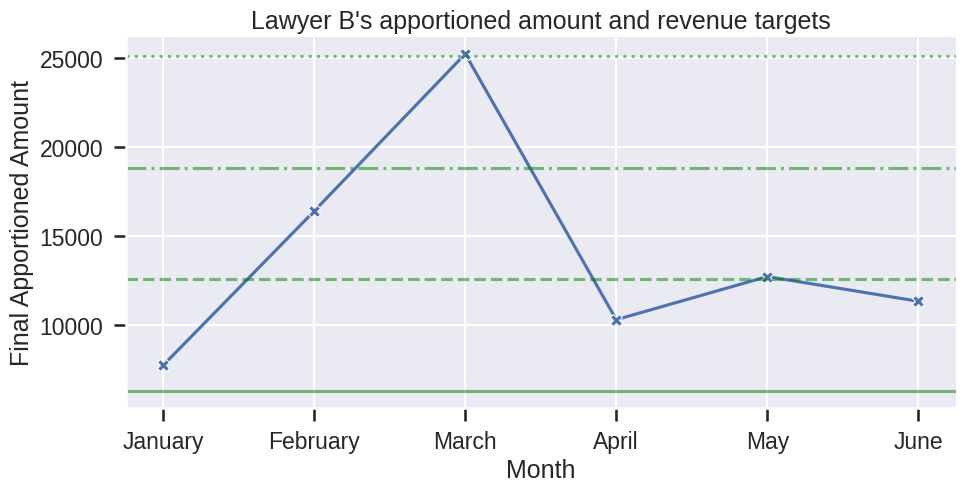

In [ ]:
def kpiplot(df, ctc, letter):
    sns.relplot(x = 'Month',
                y = 'Final Apportioned Amount',
                kind = 'line',
                marker = 'X',
                aspect = 2,
                data = df)
    plt.axhline(y = ctc, linestyle = '-', alpha = 0.5, color = 'g')
    plt.axhline(y = 2 * ctc, linestyle = '--', alpha = 0.5, color = 'g')
    plt.axhline(y = 3 * ctc, linestyle = '-.', alpha = 0.5, color = 'g')
    plt.axhline(y = 4 * ctc, linestyle = ':', alpha = 0.5, color = 'g')
    plt.title('Lawyer ' + str(letter) + '\'s apportioned amount and revenue targets')
    return plt.show()

kpiplot(b_kpi, 6284.43, 'B')

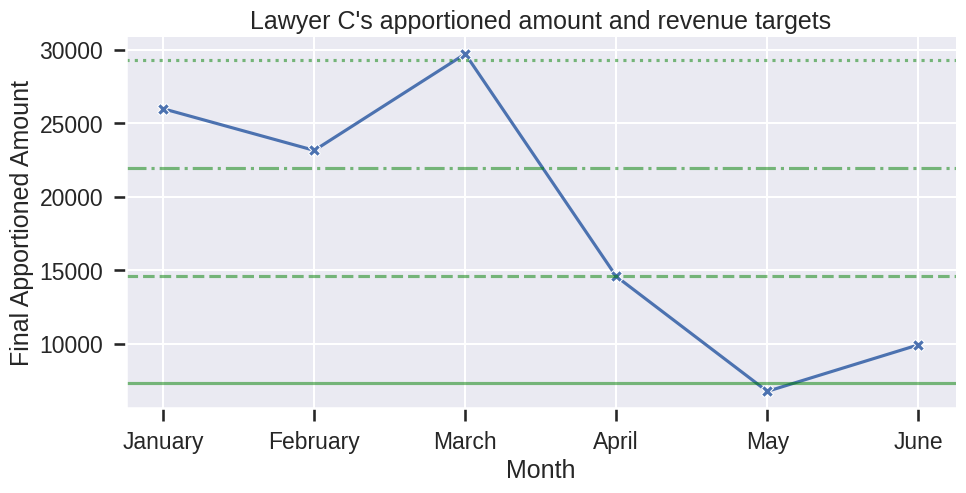

In [ ]:
kpiplot(c_kpi, 7320, 'C')

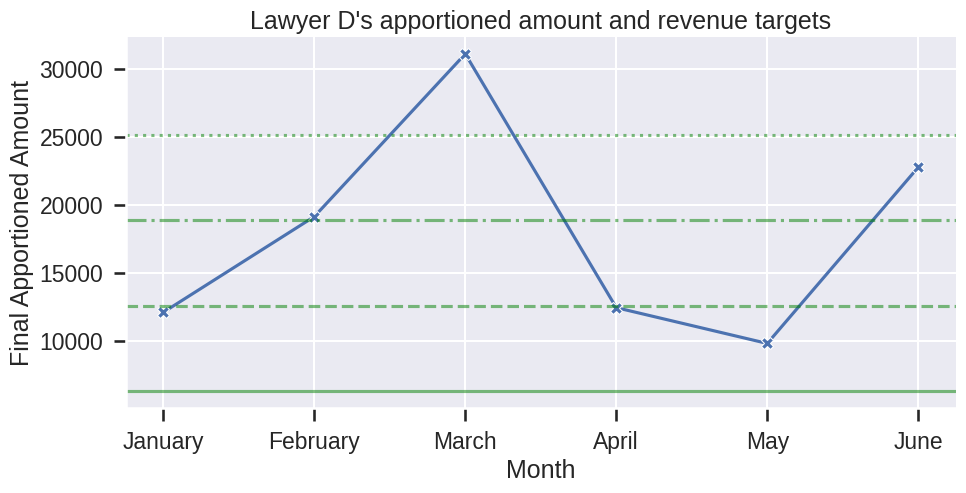

In [ ]:
kpiplot(d_kpi, 6284.43, 'D')

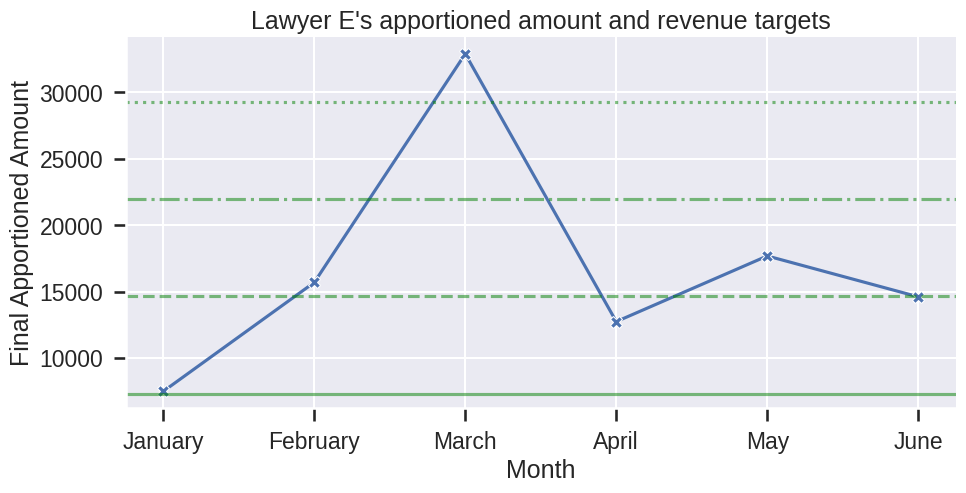

In [ ]:
kpiplot(e_kpi, 7320, 'E')

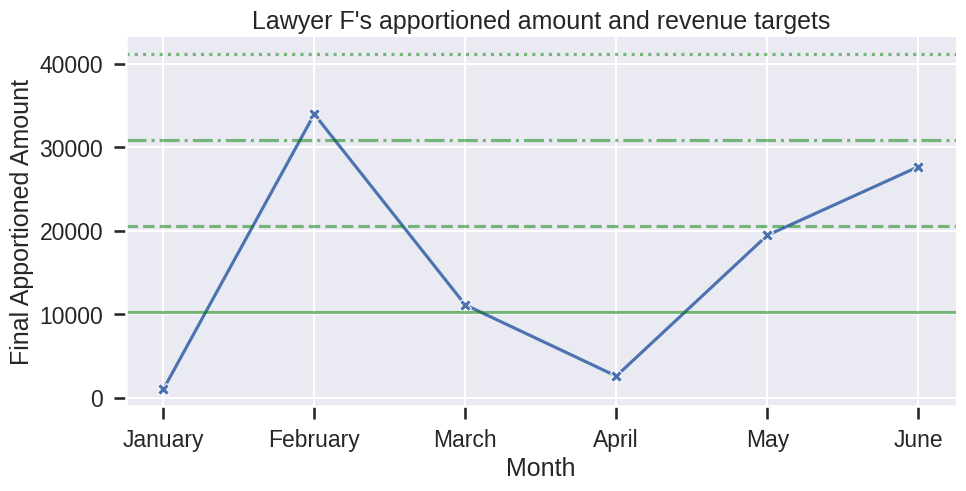

In [ ]:
kpiplot(f_kpi, 10308.75, 'F')

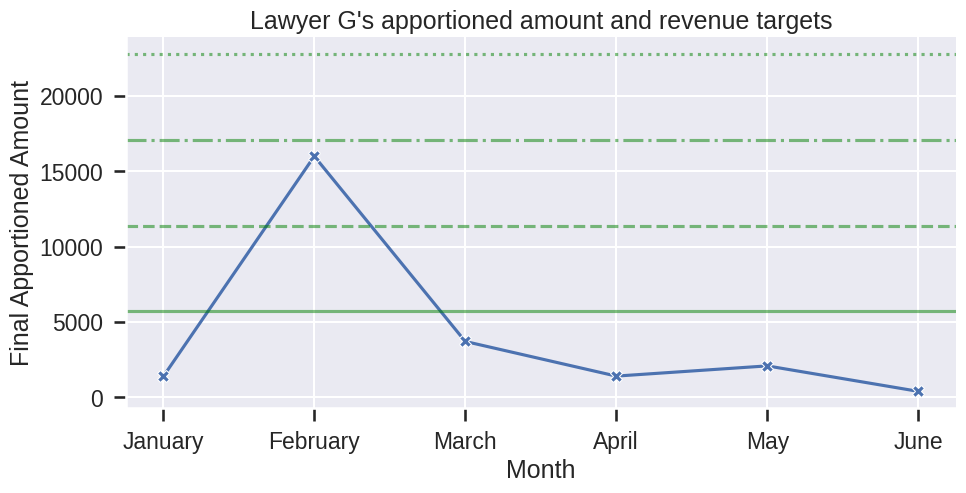

In [ ]:
kpiplot(g_kpi, 5699.43, 'G')